In [71]:
import pandas as pd

data = r"T:\Project\aeT00989.00 Decarbonization Feasibility Study\09. Documents, Drawings\9.71 Project Management\09.71.01 Current documents\25. Ranking\MACC.xlsx"
dfMACC_overall = pd.read_excel(data, sheet_name="new", index_col=0, header=1)
dfMACC_overall.dropna(subset=["Opportunity", "Site"], inplace=True)
dfMACC_overall = dfMACC_overall.loc[dfMACC_overall["Abatement Potential"] > 0]
dfMACC_overall = dfMACC_overall.iloc[:, 0:5]
dfMACC_overall["Annualized Cost"] = dfMACC_overall["Abatement Potential"] * dfMACC_overall["Abatement Cost"]
dfMACC_overall

c:\Users\IDM252577\Desktop\Python Projects\Decarbonization\Rotalysis\.venv\Lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)
c:\Users\IDM252577\Desktop\Python Projects\Decarbonization\Rotalysis\.venv\Lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


,Site,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost
S.No,,,,,,
1.0,UZ,GT Electrification,87.000000,521.6900,238.000,45387.030000
21.0,US+NASR,GT Electrification,75.000000,488.0000,158.000,36600.000000
11.0,LZ,GT Electrification,136.000000,554.7000,492.000,75439.200000
31.0,UL+SARB,GT Electrification,132.000000,261.2770,222.000,34488.564000
61.0,ABK,GT Electrification,151.000000,379.9800,387.000,57376.980000
32.0,UL+SARB,GT Performace Upgrade,-20.000000,16.4350,0.900,-328.700000
62.0,ABK KPP,GT Performace Upgrade,-18.000000,2.4490,0.750,-44.082000
58.0,UAD+SATAH,Solar,-108.000000,5.5700,12.000,-601.560000
57.0,UAD+SATAH,Wind,-35.400000,4.3800,11.550,-155.052000


In [72]:
sites = dfMACC_overall["Site"].unique()
site_dfs = {site: dfMACC_overall.loc[dfMACC_overall["Site"] == site] for site in sites}

In [73]:
dfMACC_combined = dfMACC_overall.groupby(by=["Opportunity"], as_index=False).sum()
dfMACC_combined["Abatement Cost"] = dfMACC_combined["Annualized Cost"] / dfMACC_combined["Abatement Potential"]
dfMACC_combined


C:\Users\IDM252577\AppData\Local\Temp\ipykernel_17284\105385210.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfMACC_combined = dfMACC_overall.groupby(by=["Opportunity"], as_index=False).sum()


,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost
0,Amenities Efficiency Improvement,13.556686,4.0310,2.015,54.647000
1,EV Vehicles,49.360000,0.0900,0.396,4.442400
2,GT Electrification,113.024330,2205.6470,1497.000,249291.774000
3,GT Performace Upgrade,-16.695425,80.1610,19.200,-1338.322000
4,Miscellaneous Electrification,1307.000000,0.0294,0.410,38.425800
5,Motor Driven Equipment Performance Upgradation,100.508786,6.4540,1.500,648.683702
6,Process Heating Electrification,386.000000,54.2960,38.200,20958.256000
7,Solar,-108.000000,5.5700,12.000,-601.560000
8,Steam System Efficiency Improvement,15.000000,1.8920,0.500,28.380000
9,Wind,-35.400000,4.3800,11.550,-155.052000


In [74]:
def get_annotation_position(left, width, height):
    annotate_y = height
    annotate_x = left + width / 2
    return (annotate_x, annotate_y)

Overall MACC

In [75]:
dfMACC = dfMACC_combined.copy()
dfMACC.sort_values(by=["Abatement Cost"], inplace=True)
dfMACC.reset_index(inplace=True, drop=True)
dfMACC["Cumulative Emission"] = dfMACC["Abatement Potential"].cumsum()
dfMACC["Cumulative CAPEX"] = dfMACC["Capex"].cumsum()
table_data = [dfMACC.columns.tolist()] + dfMACC.values.tolist()

columns_to_round = ["Abatement Potential", "Abatement Cost", "Annualized Cost", "Cumulative Emission", "Cumulative CAPEX"]
for col in columns_to_round:
    dfMACC[col] = dfMACC[col].astype(float).round(1)
dfMACC

,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost,Cumulative Emission,Cumulative CAPEX
0,Solar,-108.0,5.6,12.000,-601.6,5.6,12.0
1,Wind,-35.4,4.4,11.550,-155.1,10.0,23.6
2,GT Performace Upgrade,-16.7,80.2,19.200,-1338.3,90.1,42.8
3,Amenities Efficiency Improvement,13.6,4.0,2.015,54.6,94.1,44.8
4,Steam System Efficiency Improvement,15.0,1.9,0.500,28.4,96.0,45.3
5,EV Vehicles,49.4,0.1,0.396,4.4,96.1,45.7
6,Motor Driven Equipment Performance Upgradation,100.5,6.5,1.500,648.7,102.6,47.2
7,GT Electrification,113.0,2205.6,1497.000,249291.8,2308.2,1544.2
8,Process Heating Electrification,386.0,54.3,38.200,20958.3,2362.5,1582.4
9,Miscellaneous Electrification,1307.0,0.0,0.410,38.4,2362.6,1582.8


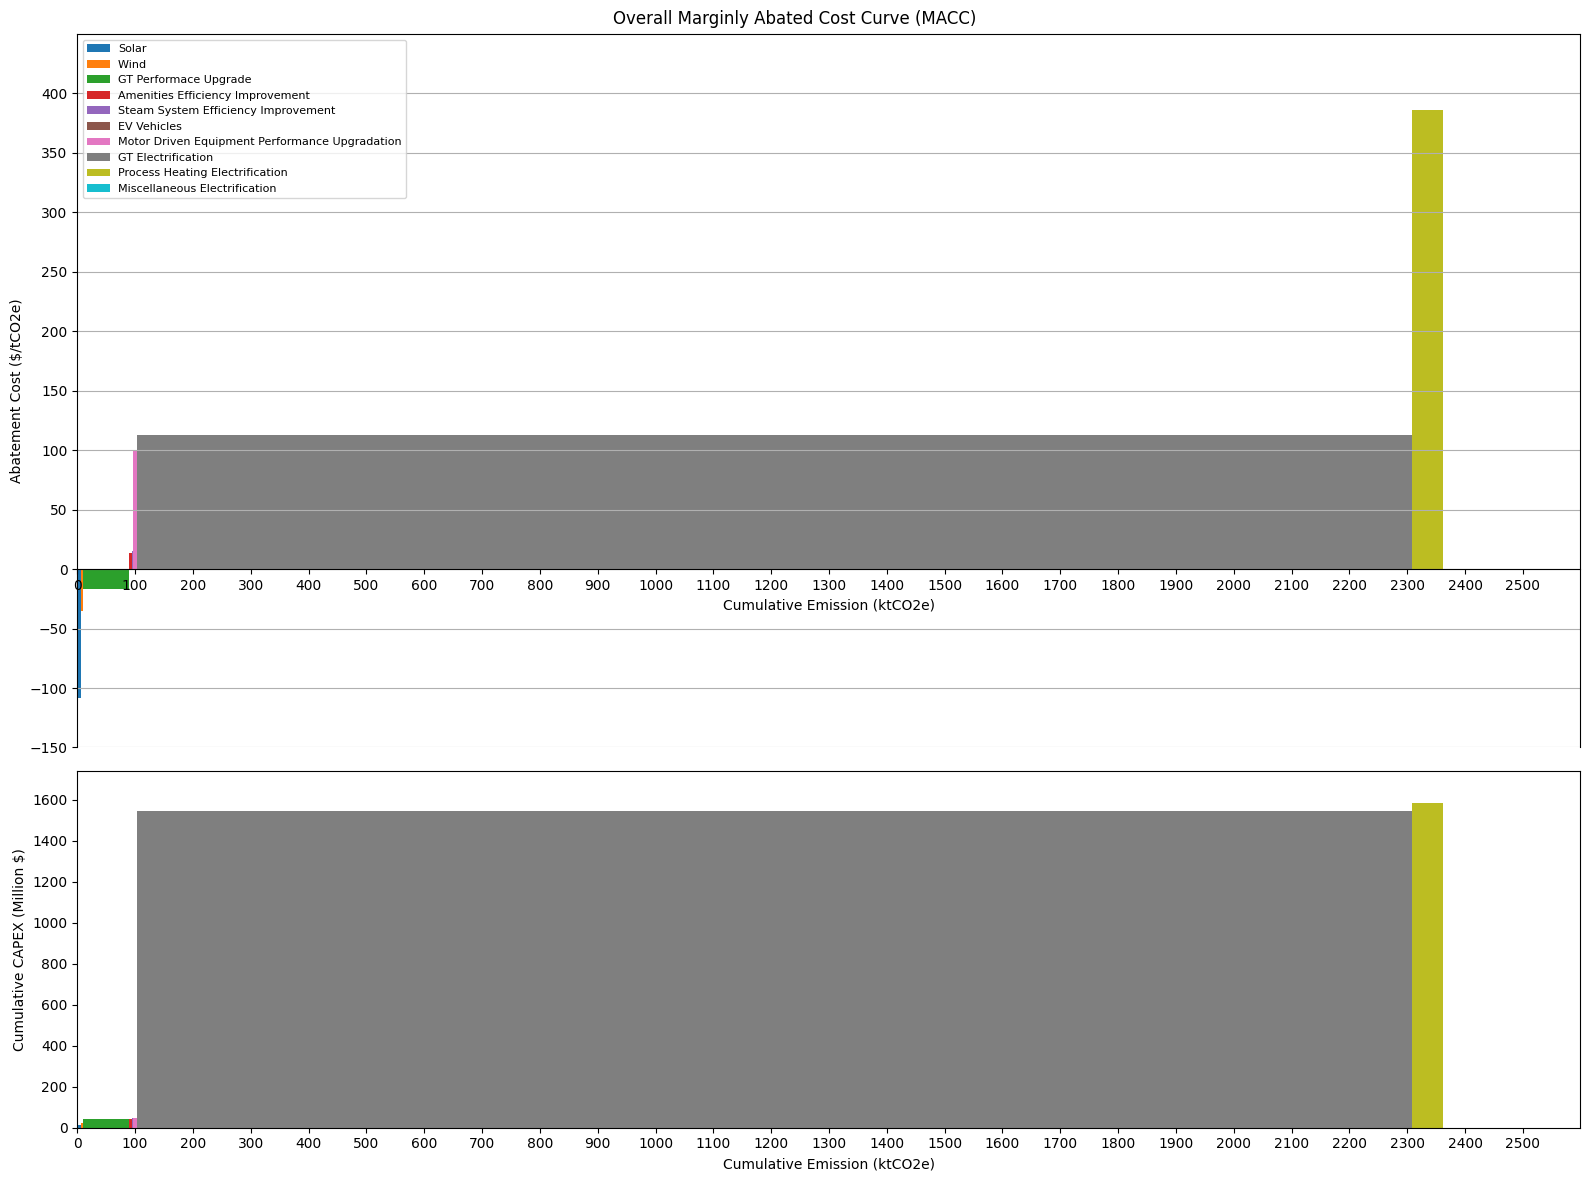

In [76]:
import matplotlib.pyplot as plt
import numpy as np


# Define functions for getting text and annotation positions
def get_text_position(left, width, height, previous):
    text_x = left + width / 2
    text_y = height / 2 if height >= 0 else height + (previous - height) / 2
    rotation = 90 if height >= 0 else -90
    return text_x, text_y, rotation


# Data from dfMACC
emission = dfMACC["Cumulative Emission"].tolist()
abat_cost = dfMACC["Abatement Cost"].tolist()
differences = dfMACC["Abatement Potential"].tolist()
opportunity = dfMACC["Opportunity"].tolist()
cpex = dfMACC["Cumulative CAPEX"].tolist()

# Create subplots
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])  # Adjust height ratios as needed

# Create the top and bottom subplots
ax2 = fig.add_subplot(gs[1])
ax1 = fig.add_subplot(gs[0], sharex=ax2)

# Set spines for ax1
ax1.spines[["left", "bottom"]].set_position(("data", 0))

# Plot Bar Chart on Top Plot
left = 0
previous = 0

for height, width, opp in zip(abat_cost, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, previous)
    ax1.bar(left, height, width=width, align="edge", label=opp)
    left += width
    previous = get_text_position(left, width, height, previous)[0]

ax1.set_xlim(0, 1.1 * max(emission))
x_scale = 100
ax1.set_xticks(np.arange(0, 1.1 * max(emission), x_scale))
ax1.set_xlabel("Cumulative Emission (ktCO2e)")
ax1.set_ylabel("Abatement Cost ($/tCO2e)")
ax1.legend(loc="upper left", fontsize=8)
ax1.set_ylim(-150, 450)
ax1.set_yticks(np.arange(-150, 450, 50))
ax1.grid(visible=True, axis="y")

# Plot Line Graph on Bottom Plot
left = 0
previous = 0
for height, width, opp in zip(cpex, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, previous)
    ax2.bar(left, height, width=width, align="edge", label=opp)
    left += width
    previous = get_text_position(left, width, height, previous)[0]

ax2.grid(visible=False)
ax2.set_ylabel("Cumulative CAPEX (Million $)")
ax2.set_xlabel("Cumulative Emission (ktCO2e)")
ax2.set_ylim(0, 1.1 * max(cpex))

# Add a title and adjust layout
title = "Overall Marginly Abated Cost Curve (MACC)"
plt.suptitle(title)
plt.tight_layout()

# Show the plots
plt.show()

Overall MACC without GT Electrification and Process Heating

In [77]:
dfMACC = dfMACC_combined.copy()
dfMACC.sort_values(by=["Abatement Cost"], inplace=True)
dfMACC.reset_index(inplace=True, drop=True)
dfMACC = dfMACC.iloc[0:7, :]
dfMACC["Cumulative Emission"] = dfMACC["Abatement Potential"].cumsum()
dfMACC["Cumulative CAPEX"] = dfMACC["Capex"].cumsum()
table_data = [dfMACC.columns.tolist()] + dfMACC.values.tolist()

columns_to_round = ["Abatement Potential", "Abatement Cost", "Annualized Cost", "Cumulative Emission", "Cumulative CAPEX"]
for col in columns_to_round:
    dfMACC[col] = dfMACC[col].astype(float).round(1)
dfMACC

,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost,Cumulative Emission,Cumulative CAPEX
0,Solar,-108.0,5.6,12.000,-601.6,5.6,12.0
1,Wind,-35.4,4.4,11.550,-155.1,10.0,23.6
2,GT Performace Upgrade,-16.7,80.2,19.200,-1338.3,90.1,42.8
3,Amenities Efficiency Improvement,13.6,4.0,2.015,54.6,94.1,44.8
4,Steam System Efficiency Improvement,15.0,1.9,0.500,28.4,96.0,45.3
5,EV Vehicles,49.4,0.1,0.396,4.4,96.1,45.7
6,Motor Driven Equipment Performance Upgradation,100.5,6.5,1.500,648.7,102.6,47.2


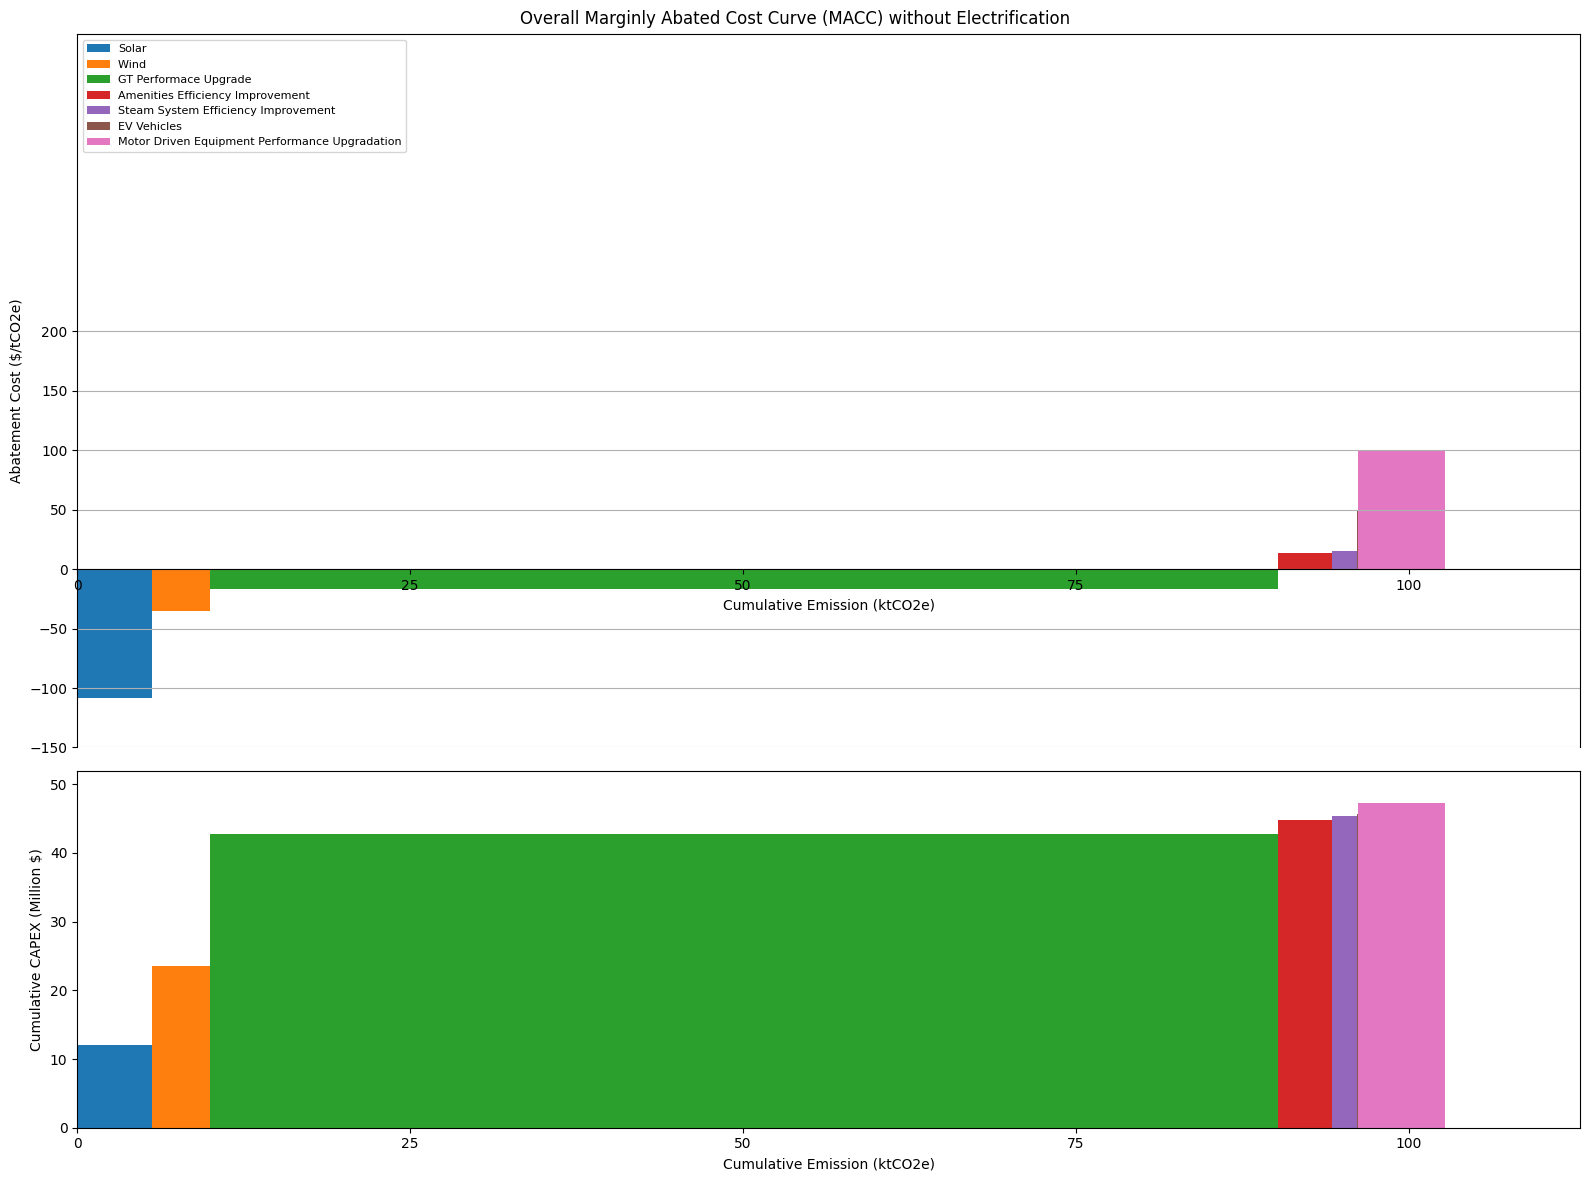

In [78]:
import matplotlib.pyplot as plt
import numpy as np


# Define functions for getting text and annotation positions
def get_text_position(left, width, height, previous):
    text_x = left + width / 2
    text_y = height / 2 if height >= 0 else height + (previous - height) / 2
    rotation = 90 if height >= 0 else -90
    return text_x, text_y, rotation


# Data from dfMACC
emission = dfMACC["Cumulative Emission"].tolist()
abat_cost = dfMACC["Abatement Cost"].tolist()
differences = dfMACC["Abatement Potential"].tolist()
opportunity = dfMACC["Opportunity"].tolist()
cpex = dfMACC["Cumulative CAPEX"].tolist()

# Create subplots
fig = plt.figure(figsize=(16, 12))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1])  # Adjust height ratios as needed

# Create the top and bottom subplots
ax2 = fig.add_subplot(gs[1])
ax1 = fig.add_subplot(gs[0], sharex=ax2)

# Set spines for ax1
ax1.spines[["left", "bottom"]].set_position(("data", 0))

# Plot Bar Chart on Top Plot
left = 0
previous = 0

for height, width, opp in zip(abat_cost, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, previous)
    ax1.bar(left, height, width=width, align="edge", label=opp)
    left += width
    previous = get_text_position(left, width, height, previous)[0]

ax1.set_xlim(0, 1.1 * max(emission))
x_scale = 25
ax1.set_xticks(np.arange(0, 1.1 * max(emission), x_scale))
ax1.set_xlabel("Cumulative Emission (ktCO2e)")
ax1.set_ylabel("Abatement Cost ($/tCO2e)")
ax1.legend(loc="upper left", fontsize=8)
ax1.set_ylim(-150, 450)
ax1.set_yticks(np.arange(-150, 250, 50))
ax1.grid(visible=True, axis="y")

# Plot Line Graph on Bottom Plot
left = 0
previous = 0
for height, width, opp in zip(cpex, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, previous)
    ax2.bar(left, height, width=width, align="edge", label=opp)
    left += width
    previous = get_text_position(left, width, height, previous)[0]

ax2.grid(visible=False)
ax2.set_ylabel("Cumulative CAPEX (Million $)")
ax2.set_xlabel("Cumulative Emission (ktCO2e)")
ax2.set_ylim(0, 1.1 * max(cpex))

# Add a title and adjust layout
title = "Overall Marginly Abated Cost Curve (MACC) without Electrification"
plt.suptitle(title)
plt.tight_layout()

# Show the plots
plt.show()

Overall MACC without GT Electrification

In [79]:
title = "MACC - Overall - Without GT Electrification"
x_scale = 500
dfMACC = dfMACC_combined[dfMACC_combined["Opportunity"] != "GT Electrification"].copy()
dfMACC.sort_values(by=["Abatement Cost"], inplace=True)
dfMACC["Cumulative Emission"] = dfMACC["Abatement Potential"].cumsum()
dfMACC["Cumulative CAPEX"] = dfMACC["Capex"].cumsum()
table_data = [dfMACC.columns.tolist()] + dfMACC.values.tolist()

columns_to_round = ["Abatement Potential", "Abatement Cost", "Annualized Cost", "Cumulative Emission", "Cumulative CAPEX"]
for col in columns_to_round:
    dfMACC[col] = dfMACC[col].astype(float).round(1)
dfMACC

,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost,Cumulative Emission,Cumulative CAPEX
7,Solar,-108.0,5.6,12.000,-601.6,5.6,12.0
9,Wind,-35.4,4.4,11.550,-155.1,10.0,23.6
3,GT Performace Upgrade,-16.7,80.2,19.200,-1338.3,90.1,42.8
0,Amenities Efficiency Improvement,13.6,4.0,2.015,54.6,94.1,44.8
8,Steam System Efficiency Improvement,15.0,1.9,0.500,28.4,96.0,45.3
1,EV Vehicles,49.4,0.1,0.396,4.4,96.1,45.7
5,Motor Driven Equipment Performance Upgradation,100.5,6.5,1.500,648.7,102.6,47.2
6,Process Heating Electrification,386.0,54.3,38.200,20958.3,156.9,85.4
4,Miscellaneous Electrification,1307.0,0.0,0.410,38.4,156.9,85.8


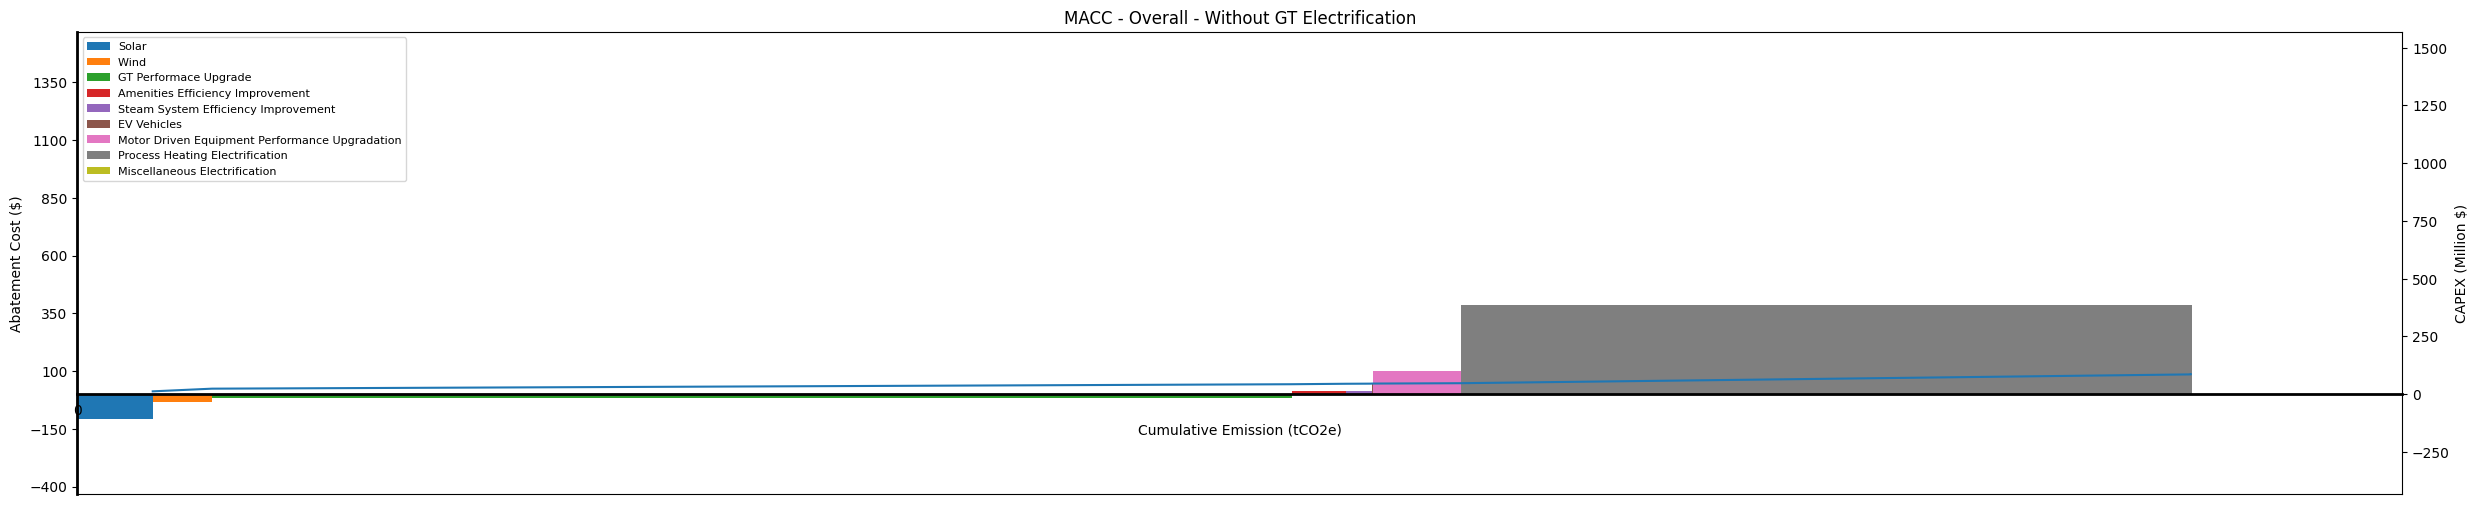

In [80]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np

# plt.style.use("fivethirtyeight")

emission = dfMACC["Cumulative Emission"].tolist()
abat_cost = dfMACC["Abatement Cost"].tolist()
differences = dfMACC["Abatement Potential"].tolist()
opportunity = dfMACC["Opportunity"].tolist()

fig, ax1 = plt.subplots(figsize=(30, 6))
ax1.spines[["left", "bottom"]].set_position(("data", 0))
ax1.spines[["top", "right"]].set_visible(False)


left = 0
pervious = 0
for height, width, opp in zip(abat_cost, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, pervious)

    ax1.bar(left, height, width=width, align="edge", label=opp)
    # ax1.annotate(
    #     opp,
    #     xy=get_annotation_position(left, width, height),
    #     xytext=(text_x, text_y),
    #     textcoords="offset points",
    #     ha="left",
    #     va="bottom",
    #     rotation=90,
    #     arrowprops=dict(arrowstyle="->", connectionstyle="angle,angleA=0,angleB=90,rad=10", color="black"),
    #     fontsize=8,
    # )
    left += width
    previous = get_text_position(left, width, height, pervious)[0]

ax1.set_xlim(0, 1.1 * max(emission))
ax1.set_xticks(np.arange(0, 1.1 * max(emission), x_scale))

ax1.set_yticks(np.arange(np.round(4 * min(abat_cost), -2), np.round(1.2 * max(abat_cost), -2), 250))

ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines[["top"]].set_visible(False)

ax1.set_xlabel("Cumulative Emission (tCO2e)")
ax1.set_ylabel("Abatement Cost ($)")
ax1.set_title(title)
ax1.legend(loc="upper left", fontsize=8)

ax2 = ax1.twinx()
ax2.grid(visible=False)
cpex = dfMACC["Cumulative CAPEX"].tolist()
ax2.set_xlabel("Cumulative CAPEX (USD)")
ax2.set_ylabel("CAPEX (Million $)")

ax2.plot(emission, cpex)

max_y = max(max(abat_cost), 2 * max(cpex))

min_y = min(2 * min(abat_cost), 0)


# ax1.set_ylim(min_y, max_y)
# ax2.set_ylim(min_y, max_y)
ax1.set_ylim(min(0, 4 * min(abat_cost)), 1.2 * max(abat_cost))
# ax2.set_ylim(-400, np.round(1.2 * max(cpex), -2))
ax2.set_ylim(min(0, 4 * min(abat_cost)), 1.2 * max(abat_cost))


# table = Table(ax1, loc="center")

# table.auto_set_font_size(False)
# table.set_fontsize(12)
# table.scale(1, 1.5)

# for i, row in enumerate(table_data):
#     for j, cell in enumerate(row):
#         table.add_cell(i, j, width=0.1, height=0.1, text=cell, loc="center", facecolor="white")

# ax1.add_table(table)


plt.show()


MACC - Upper Zakum

In [81]:
title = "MACC - Upper Zakum"
x_scale = 50

dfMACC = dfMACC_overall[dfMACC_overall["Site"] == "UZ"].copy()
dfMACC.sort_values(by=["Abatement Cost"], inplace=True)
dfMACC["Cumulative Emission"] = dfMACC["Abatement Potential"].cumsum()
dfMACC["Cumulative CAPEX"] = dfMACC["Capex"].cumsum()
table_data = [dfMACC.columns.tolist()] + dfMACC.values.tolist()

columns_to_round = ["Abatement Potential", "Abatement Cost", "Annualized Cost", "Cumulative Emission", "Cumulative CAPEX"]
for col in columns_to_round:
    dfMACC[col] = dfMACC[col].astype(float).round(1)
dfMACC

,Site,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost,Cumulative Emission,Cumulative CAPEX
S.No,,,,,,,,
2.0,UZ,GT Performace Upgrade,-18.0,38.7,10.20,-696.7,38.7,10.2
1.0,UZ,GT Electrification,87.0,521.7,238.00,45387.0,560.4,248.2
10.0,UZ,Miscellaneous Electrification,1307.0,0.0,0.41,38.4,560.4,248.6


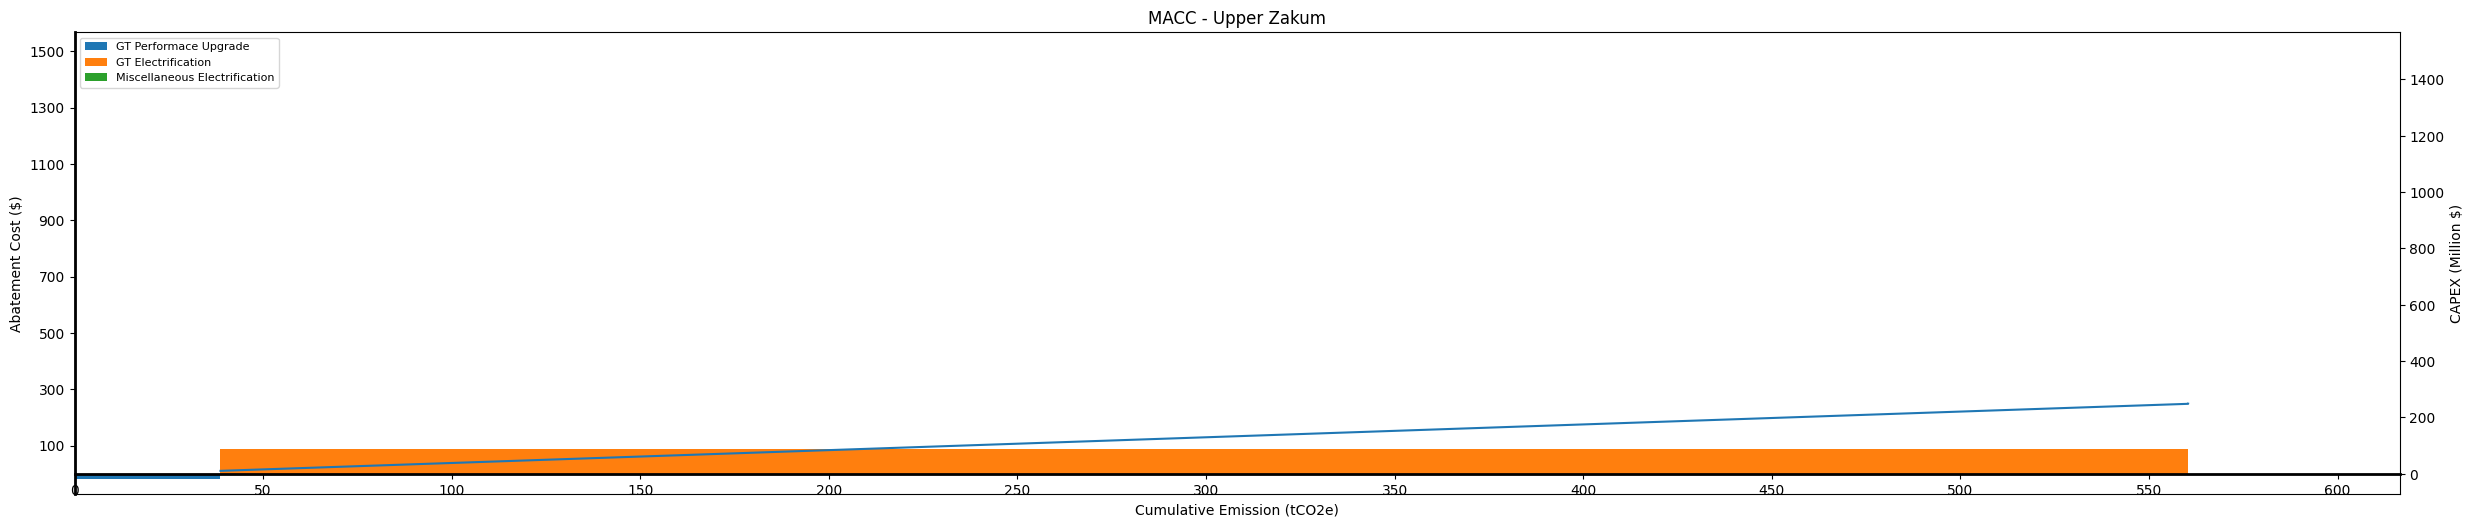

In [82]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np

# plt.style.use("fivethirtyeight")

emission = dfMACC["Cumulative Emission"].tolist()
abat_cost = dfMACC["Abatement Cost"].tolist()
differences = dfMACC["Abatement Potential"].tolist()
opportunity = dfMACC["Opportunity"].tolist()

fig, ax1 = plt.subplots(figsize=(30, 6))
ax1.spines[["left", "bottom"]].set_position(("data", 0))
ax1.spines[["top", "right"]].set_visible(False)


left = 0
pervious = 0
for height, width, opp in zip(abat_cost, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, pervious)

    ax1.bar(left, height, width=width, align="edge", label=opp)
    left += width
    previous = get_text_position(left, width, height, pervious)[0]

ax1.set_xlim(0, 1.1 * max(emission))
ax1.set_xticks(np.arange(0, 1.1 * max(emission), x_scale))

ax1.set_yticks(np.arange(np.round(4 * min(abat_cost), -2), np.round(1.2 * max(abat_cost), -2), 200))

ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines[["top"]].set_visible(False)

ax1.set_xlabel("Cumulative Emission (tCO2e)")
ax1.set_ylabel("Abatement Cost ($)")
ax1.set_title(title)
ax1.legend(loc="upper left", fontsize=8)

ax2 = ax1.twinx()
ax2.grid(visible=False)
cpex = dfMACC["Cumulative CAPEX"].tolist()
ax2.set_xlabel("Cumulative CAPEX (USD)")
ax2.set_ylabel("CAPEX (Million $)")

ax2.plot(emission, cpex)

max_y = max(max(abat_cost), 2 * max(cpex))

min_y = min(2 * min(abat_cost), 0)

ax1.set_ylim(min(0, 4 * min(abat_cost)), 1.2 * max(abat_cost))
ax2.set_ylim(min(0, 4 * min(abat_cost)), 1.2 * max(abat_cost))

plt.show()


MACC - Lower Zakum

In [83]:
title = "MACC - Lower Zakum"
x_scale = 50

dfMACC = dfMACC_overall[dfMACC_overall["Site"] == "LZ"].copy()
dfMACC.sort_values(by=["Abatement Cost"], inplace=True)
dfMACC["Cumulative Emission"] = dfMACC["Abatement Potential"].cumsum()
dfMACC["Cumulative CAPEX"] = dfMACC["Capex"].cumsum()
table_data = [dfMACC.columns.tolist()] + dfMACC.values.tolist()

columns_to_round = ["Abatement Potential", "Abatement Cost", "Annualized Cost", "Cumulative Emission", "Cumulative CAPEX"]
for col in columns_to_round:
    dfMACC[col] = dfMACC[col].astype(float).round(1)
dfMACC


,Site,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost,Cumulative Emission,Cumulative CAPEX
S.No,,,,,,,,
NaN,LZ,GT Performace Upgrade,-16.0,2.3,0.75,-36.8,2.3,0.8
12.0,LZ,GT Performace Upgrade,-15.0,17.8,5.10,-266.8,20.1,5.8
NaN,LZ,GT Performace Upgrade,14.0,2.5,1.50,34.8,22.6,7.4
11.0,LZ,GT Electrification,136.0,554.7,492.00,75439.2,577.3,499.4


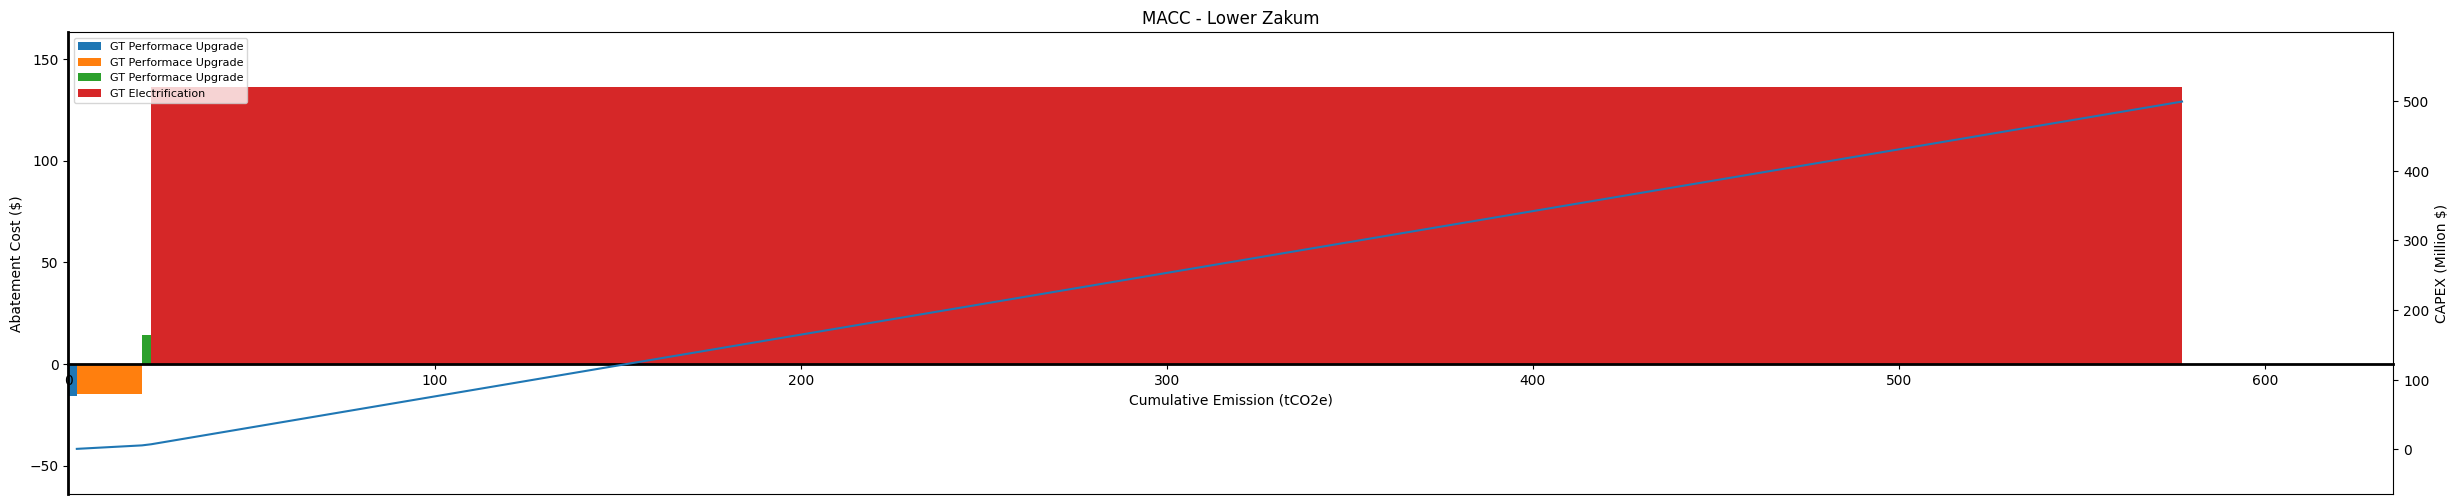

In [84]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np

# plt.style.use("fivethirtyeight")

emission = dfMACC["Cumulative Emission"].tolist()
abat_cost = dfMACC["Abatement Cost"].tolist()
differences = dfMACC["Abatement Potential"].tolist()
opportunity = dfMACC["Opportunity"].tolist()

fig, ax1 = plt.subplots(figsize=(30, 6))
ax1.spines[["left", "bottom"]].set_position(("data", 0))
ax1.spines[["top", "right"]].set_visible(False)


left = 0
pervious = 0
for height, width, opp in zip(abat_cost, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, pervious)

    ax1.bar(left, height, width=width, align="edge", label=opp)
    left += width
    previous = get_text_position(left, width, height, pervious)[0]

ax1.set_xlim(0, 1.1 * max(emission))
# ax1.set_xticks(np.arange(0, 1.1 * max(emission), x_scale))

# ax1.set_yticks(np.arange(np.round(4 * min(abat_cost), -2), np.round(1.2 * max(abat_cost), -2), 20))

ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines[["top"]].set_visible(False)

ax1.set_xlabel("Cumulative Emission (tCO2e)")
ax1.set_ylabel("Abatement Cost ($)")
ax1.set_title(title)
ax1.legend(loc="upper left", fontsize=8)

ax2 = ax1.twinx()
ax2.grid(visible=False)
cpex = dfMACC["Cumulative CAPEX"].tolist()
ax2.set_xlabel("Cumulative CAPEX (USD)")
ax2.set_ylabel("CAPEX (Million $)")

ax2.plot(emission, cpex)


ax1.set_ylim(min(0, 4 * min(abat_cost)), 1.2 * max(abat_cost))
ax2.set_ylim(min(0, 4 * min(abat_cost)), 1.2 * max(cpex))

plt.show()

US+NASR MACC

In [85]:
title = "MACC - Umm Shaif and Nasr"
x_scale = 50

dfMACC = dfMACC_overall[dfMACC_overall["Site"] == "US+NASR"].copy()
dfMACC.sort_values(by=["Abatement Cost"], inplace=True)
dfMACC["Cumulative Emission"] = dfMACC["Abatement Potential"].cumsum()
dfMACC["Cumulative CAPEX"] = dfMACC["Capex"].cumsum()
table_data = [dfMACC.columns.tolist()] + dfMACC.values.tolist()

columns_to_round = ["Abatement Potential", "Abatement Cost", "Annualized Cost", "Cumulative Emission", "Cumulative CAPEX"]
for col in columns_to_round:
    dfMACC[col] = dfMACC[col].astype(float).round(1)
dfMACC

,Site,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost,Cumulative Emission,Cumulative CAPEX
S.No,,,,,,,,
21.0,US+NASR,GT Electrification,75.0,488.0,158.0,36600.0,488.0,158.0


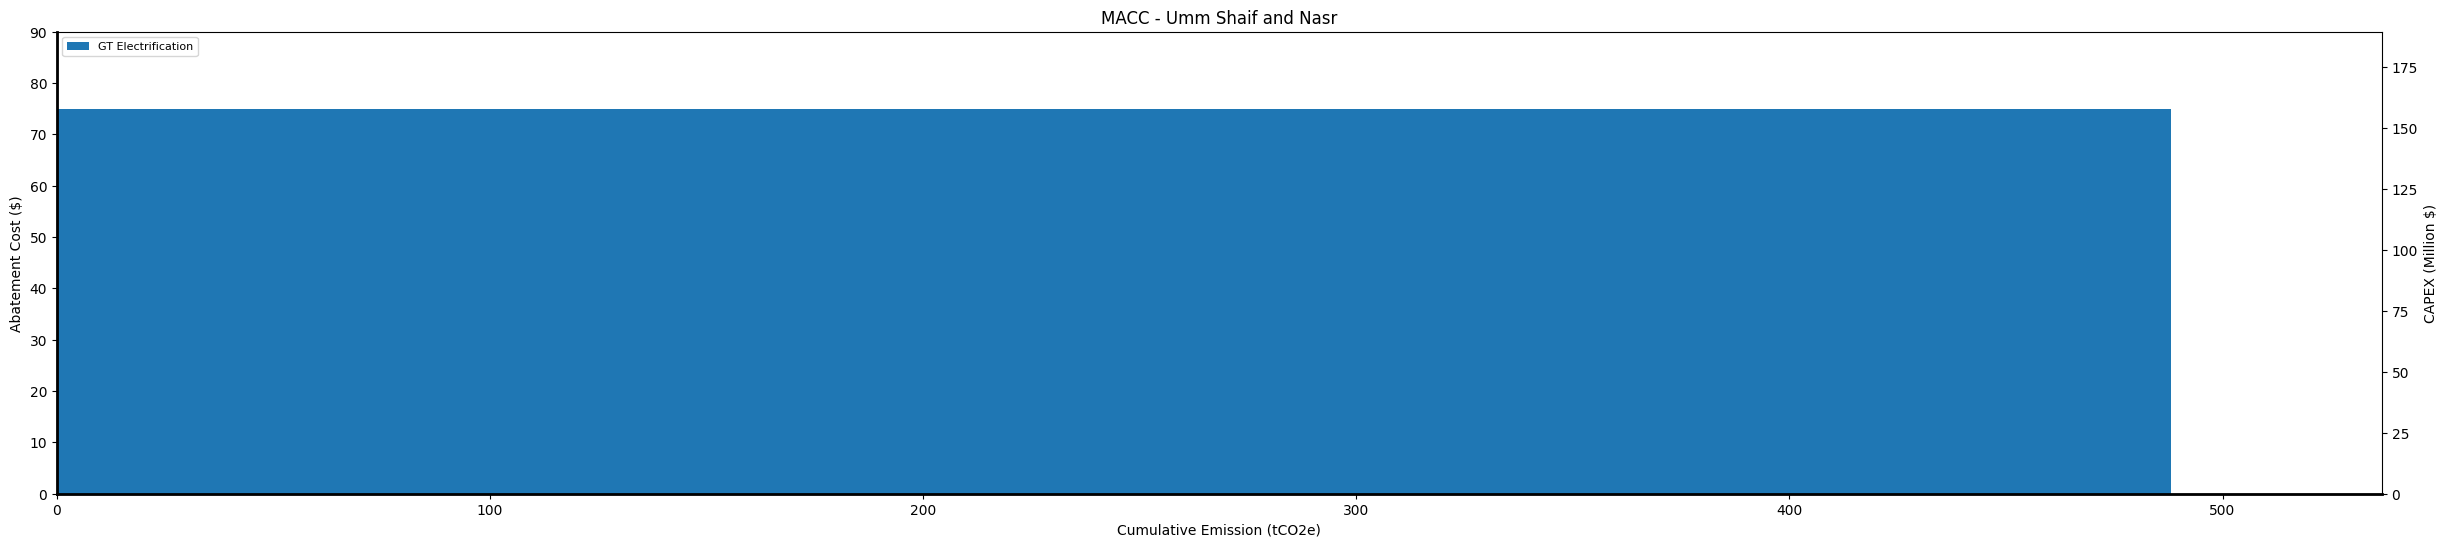

In [86]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np

# plt.style.use("fivethirtyeight")

emission = dfMACC["Cumulative Emission"].tolist()
abat_cost = dfMACC["Abatement Cost"].tolist()
differences = dfMACC["Abatement Potential"].tolist()
opportunity = dfMACC["Opportunity"].tolist()

fig, ax1 = plt.subplots(figsize=(30, 6))
ax1.spines[["left", "bottom"]].set_position(("data", 0))
ax1.spines[["top", "right"]].set_visible(False)


left = 0
pervious = 0
for height, width, opp in zip(abat_cost, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, pervious)

    ax1.bar(left, height, width=width, align="edge", label=opp)
    left += width
    previous = get_text_position(left, width, height, pervious)[0]

ax1.set_xlim(0, 1.1 * max(emission))
# ax1.set_xticks(np.arange(0, 1.1 * max(emission), x_scale))

# ax1.set_yticks(np.arange(np.round(4 * min(abat_cost), -2), np.round(1.2 * max(abat_cost), -2), 20))

ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines[["top"]].set_visible(False)

ax1.set_xlabel("Cumulative Emission (tCO2e)")
ax1.set_ylabel("Abatement Cost ($)")
ax1.set_title(title)
ax1.legend(loc="upper left", fontsize=8)

ax2 = ax1.twinx()
ax2.grid(visible=False)
cpex = dfMACC["Cumulative CAPEX"].tolist()
ax2.set_xlabel("Cumulative CAPEX (USD)")
ax2.set_ylabel("CAPEX (Million $)")

ax2.plot(emission, cpex)


ax1.set_ylim(min(0, 4 * min(abat_cost)), 1.2 * max(abat_cost))
ax2.set_ylim(min(0, 4 * min(abat_cost)), 1.2 * max(cpex))

plt.show()


UL+SARB MACC

In [87]:
title = "MACC - Umm Lulu and SARB"
x_scale = 50

dfMACC = dfMACC_overall[dfMACC_overall["Site"] == "UL+SARB"].copy()
dfMACC.sort_values(by=["Abatement Cost"], inplace=True)
dfMACC["Cumulative Emission"] = dfMACC["Abatement Potential"].cumsum()
dfMACC["Cumulative CAPEX"] = dfMACC["Capex"].cumsum()
table_data = [dfMACC.columns.tolist()] + dfMACC.values.tolist()

columns_to_round = ["Abatement Potential", "Abatement Cost", "Annualized Cost", "Cumulative Emission", "Cumulative CAPEX"]
for col in columns_to_round:
    dfMACC[col] = dfMACC[col].astype(float).round(1)
dfMACC


,Site,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost,Cumulative Emission,Cumulative CAPEX
S.No,,,,,,,,
33.0,UL+SARB,Motor Driven Equipment Performance Upgradation,-62.2,0.5,0.800,-33.6,0.5,0.8
32.0,UL+SARB,GT Performace Upgrade,-20.0,16.4,0.900,-328.7,17.0,1.7
34.0,UL+SARB,Amenities Efficiency Improvement,38.0,1.4,1.438,52.0,18.3,3.1
31.0,UL+SARB,GT Electrification,132.0,261.3,222.000,34488.6,279.6,225.1


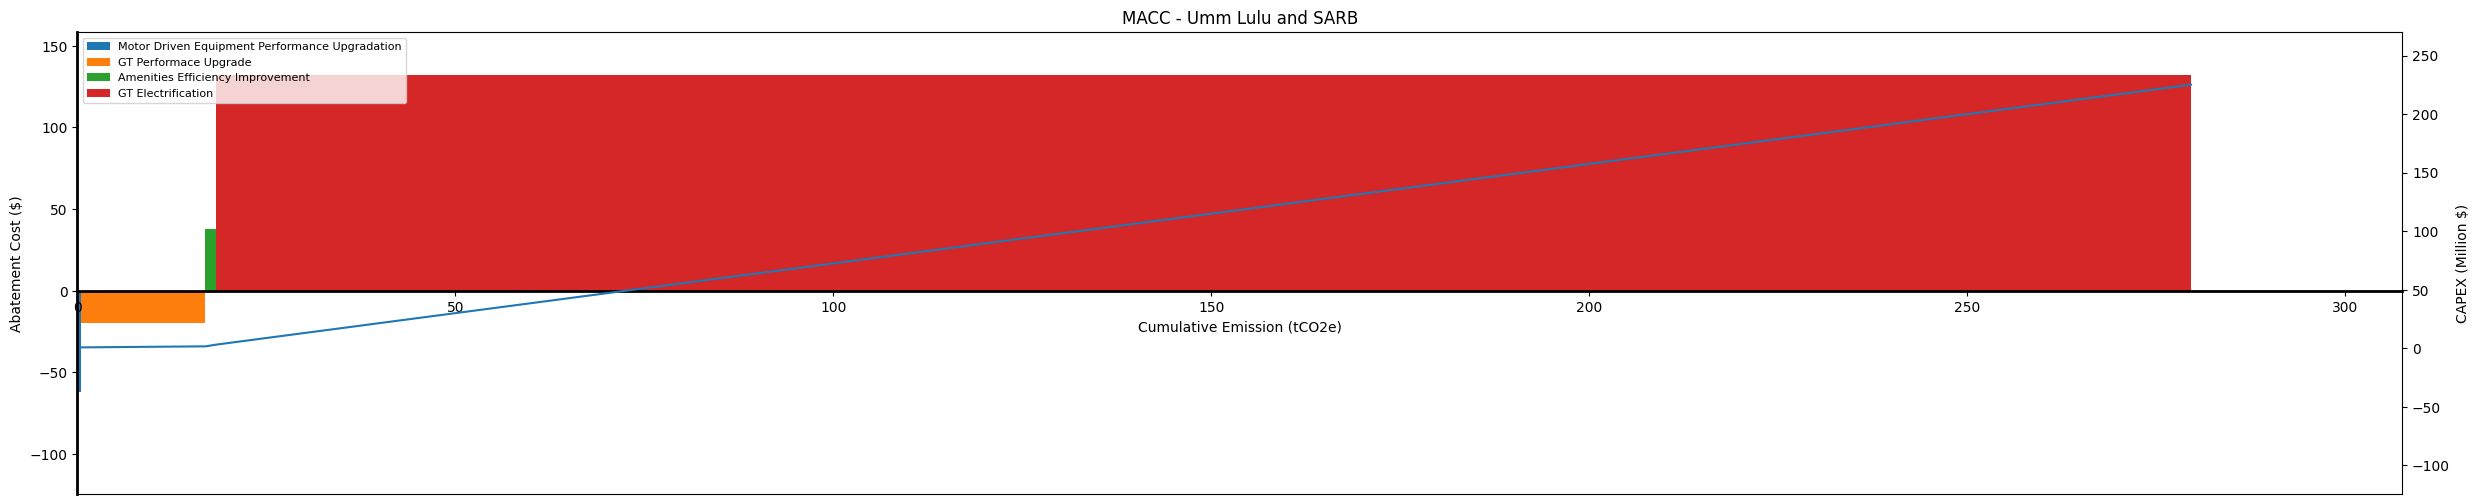

In [88]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np

# plt.style.use("fivethirtyeight")

emission = dfMACC["Cumulative Emission"].tolist()
abat_cost = dfMACC["Abatement Cost"].tolist()
differences = dfMACC["Abatement Potential"].tolist()
opportunity = dfMACC["Opportunity"].tolist()

fig, ax1 = plt.subplots(figsize=(30, 6))
ax1.spines[["left", "bottom"]].set_position(("data", 0))
ax1.spines[["top", "right"]].set_visible(False)


left = 0
pervious = 0
for height, width, opp in zip(abat_cost, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, pervious)

    ax1.bar(left, height, width=width, align="edge", label=opp)
    left += width
    previous = get_text_position(left, width, height, pervious)[0]

ax1.set_xlim(0, 1.1 * max(emission))
# ax1.set_xticks(np.arange(0, 1.1 * max(emission), x_scale))


ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines[["top"]].set_visible(False)

ax1.set_xlabel("Cumulative Emission (tCO2e)")
ax1.set_ylabel("Abatement Cost ($)")
ax1.set_title(title)
ax1.legend(loc="upper left", fontsize=8)

ax2 = ax1.twinx()
ax2.grid(visible=False)
cpex = dfMACC["Cumulative CAPEX"].tolist()
ax2.set_xlabel("Cumulative CAPEX (USD)")
ax2.set_ylabel("CAPEX (Million $)")

ax2.plot(emission, cpex)

ax1.set_ylim(min(0, 2 * min(abat_cost)), 1.2 * max(abat_cost))
ax2.set_ylim(min(0, 2 * min(abat_cost)), 1.2 * max(cpex))

plt.show()

UAD+SATAH MACC

In [89]:
title = "MACC - Umm Al Dalkh and Satah"
x_scale = 50

dfMACC = dfMACC_overall[dfMACC_overall["Site"] == "UAD+SATAH"].copy()
dfMACC.sort_values(by=["Abatement Cost"], inplace=True)
dfMACC["Cumulative Emission"] = dfMACC["Abatement Potential"].cumsum()
dfMACC["Cumulative CAPEX"] = dfMACC["Capex"].cumsum()
table_data = [dfMACC.columns.tolist()] + dfMACC.values.tolist()

columns_to_round = ["Abatement Potential", "Abatement Cost", "Annualized Cost", "Cumulative Emission", "Cumulative CAPEX"]
for col in columns_to_round:
    dfMACC[col] = dfMACC[col].astype(float).round(1)
dfMACC

,Site,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost,Cumulative Emission,Cumulative CAPEX
S.No,,,,,,,,
58.0,UAD+SATAH,Solar,-108.0,5.6,12.00,-601.6,5.6,12.0
57.0,UAD+SATAH,Wind,-35.4,4.4,11.55,-155.1,10.0,23.6
43.0,UAD+SATAH,Motor Driven Equipment Performance Upgradation,115.4,5.9,0.70,682.3,15.9,24.2


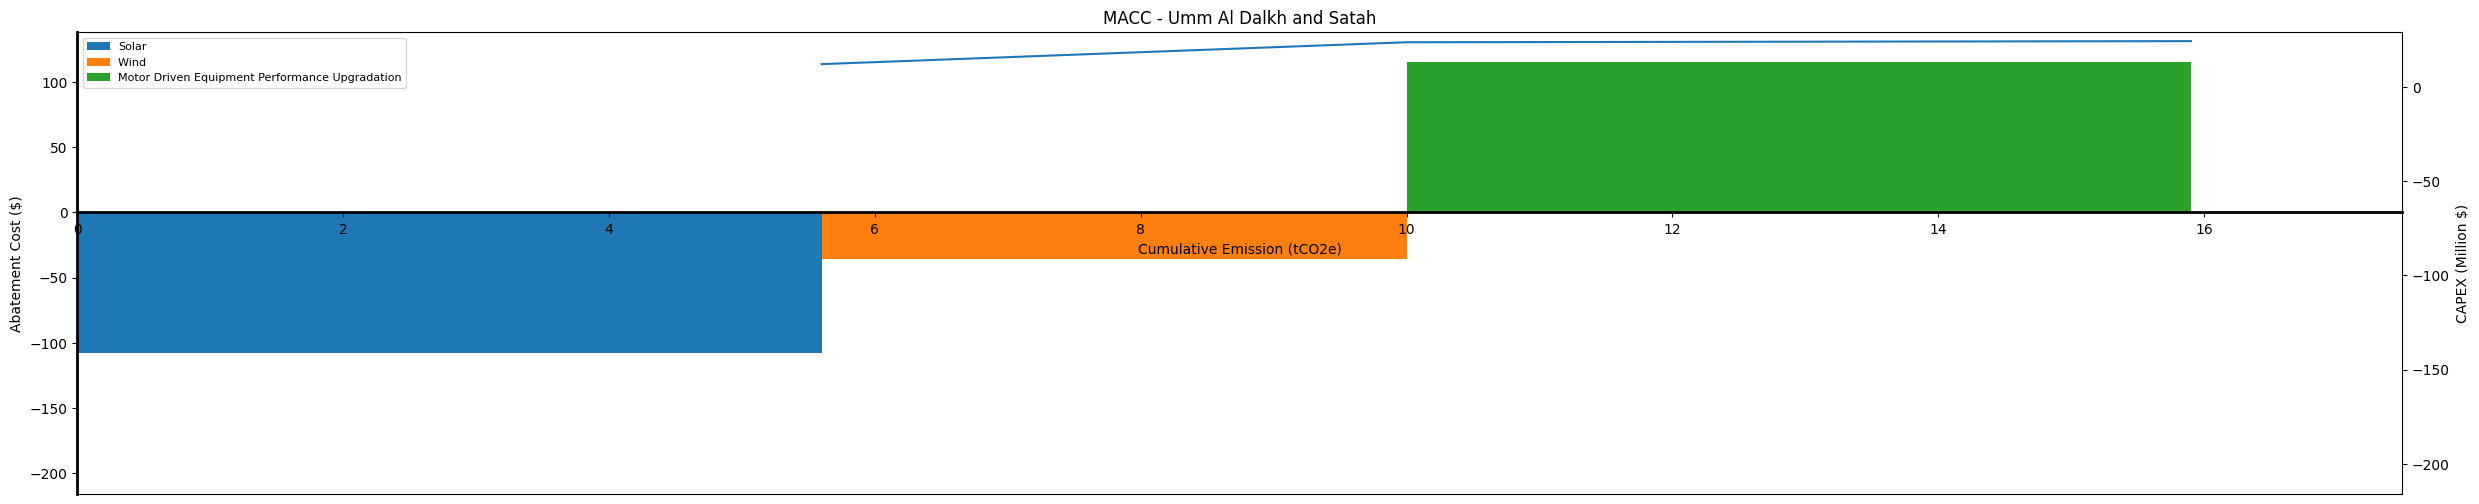

In [90]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np

# plt.style.use("fivethirtyeight")

emission = dfMACC["Cumulative Emission"].tolist()
abat_cost = dfMACC["Abatement Cost"].tolist()
differences = dfMACC["Abatement Potential"].tolist()
opportunity = dfMACC["Opportunity"].tolist()

fig, ax1 = plt.subplots(figsize=(30, 6))
ax1.spines[["left", "bottom"]].set_position(("data", 0))
ax1.spines[["top", "right"]].set_visible(False)


left = 0
pervious = 0
for height, width, opp in zip(abat_cost, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, pervious)

    ax1.bar(left, height, width=width, align="edge", label=opp)
    left += width
    previous = get_text_position(left, width, height, pervious)[0]

ax1.set_xlim(0, 1.1 * max(emission))
# ax1.set_xticks(np.arange(0, 1.1 * max(emission), x_scale))


ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines[["top"]].set_visible(False)

ax1.set_xlabel("Cumulative Emission (tCO2e)")
ax1.set_ylabel("Abatement Cost ($)")
ax1.set_title(title)
ax1.legend(loc="upper left", fontsize=8)

ax2 = ax1.twinx()
ax2.grid(visible=False)
cpex = dfMACC["Cumulative CAPEX"].tolist()
ax2.set_xlabel("Cumulative CAPEX (USD)")
ax2.set_ylabel("CAPEX (Million $)")

ax2.plot(emission, cpex)

ax1.set_ylim(min(0, 2 * min(abat_cost)), 1.2 * max(abat_cost))
ax2.set_ylim(min(0, 2 * min(abat_cost)), 1.2 * max(cpex))

plt.show()


DAS+ZIRKU MACC

In [91]:
title = "MACC - Das and Zirku"
x_scale = 50

dfMACC = dfMACC_overall[dfMACC_overall["Site"] == "DAS+ZIRKU"].copy()
dfMACC.sort_values(by=["Abatement Cost"], inplace=True)
dfMACC["Cumulative Emission"] = dfMACC["Abatement Potential"].cumsum()
dfMACC["Cumulative CAPEX"] = dfMACC["Capex"].cumsum()
table_data = [dfMACC.columns.tolist()] + dfMACC.values.tolist()

columns_to_round = ["Abatement Potential", "Abatement Cost", "Annualized Cost", "Cumulative Emission", "Cumulative CAPEX"]
for col in columns_to_round:
    dfMACC[col] = dfMACC[col].astype(float).round(1)
dfMACC

,Site,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost,Cumulative Emission,Cumulative CAPEX
S.No,,,,,,,,
55.0,DAS+ZIRKU,Steam System Efficiency Improvement,15.0,1.9,0.500,28.4,1.9,0.5
59.0,DAS+ZIRKU,EV Vehicles,49.4,0.1,0.396,4.4,2.0,0.9
56.0,DAS+ZIRKU,Process Heating Electrification,386.0,54.3,38.200,20958.3,56.3,39.1


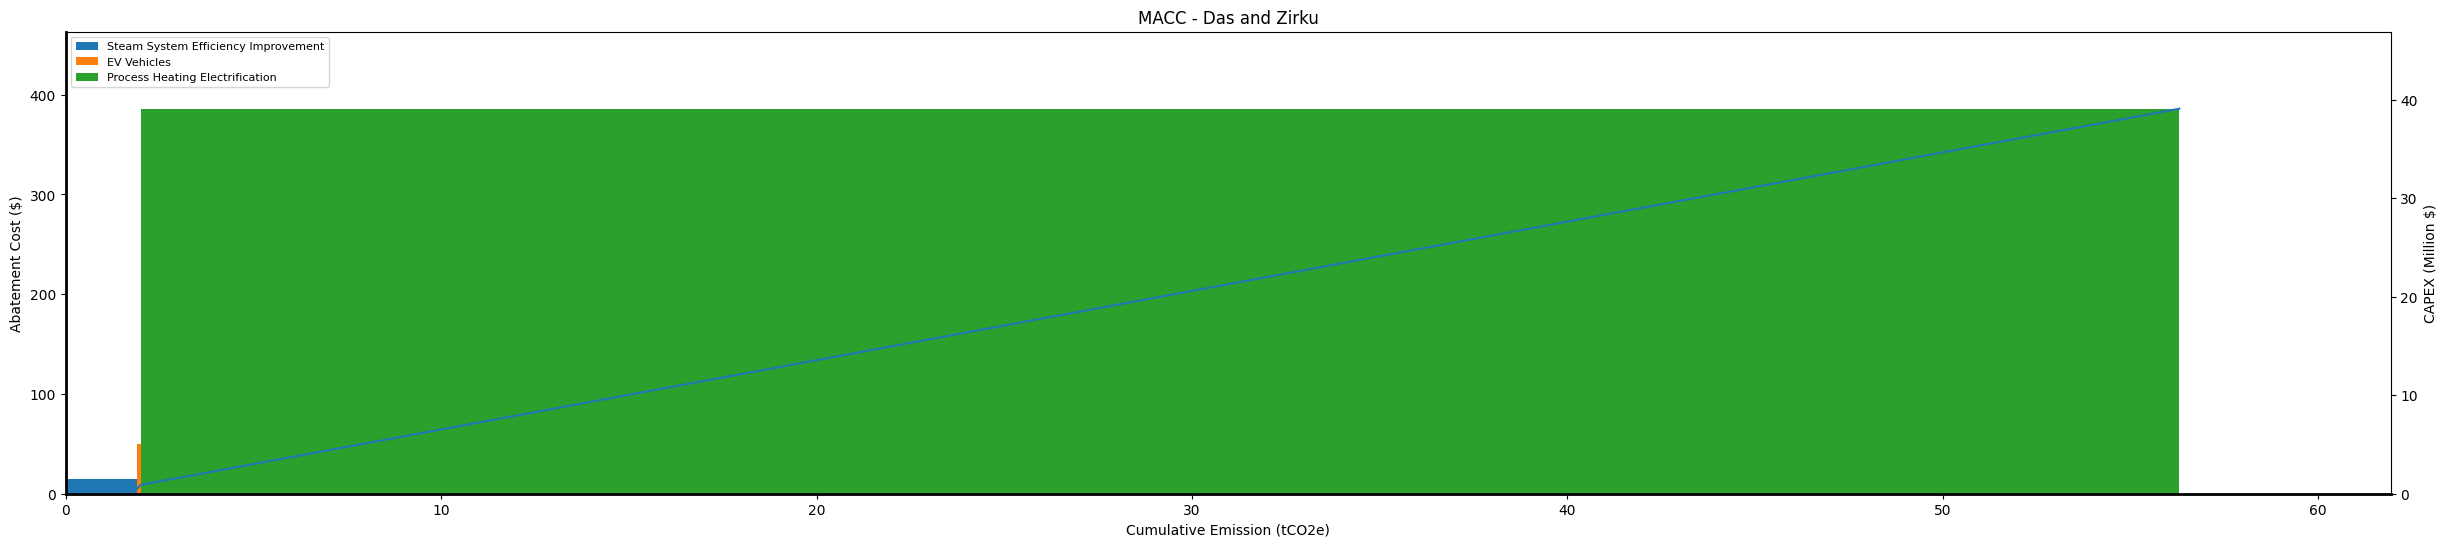

In [92]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np

# plt.style.use("fivethirtyeight")

emission = dfMACC["Cumulative Emission"].tolist()
abat_cost = dfMACC["Abatement Cost"].tolist()
differences = dfMACC["Abatement Potential"].tolist()
opportunity = dfMACC["Opportunity"].tolist()

fig, ax1 = plt.subplots(figsize=(30, 6))
ax1.spines[["left", "bottom"]].set_position(("data", 0))
ax1.spines[["top", "right"]].set_visible(False)


left = 0
pervious = 0
for height, width, opp in zip(abat_cost, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, pervious)

    ax1.bar(left, height, width=width, align="edge", label=opp)
    left += width
    previous = get_text_position(left, width, height, pervious)[0]

ax1.set_xlim(0, 1.1 * max(emission))
# ax1.set_xticks(np.arange(0, 1.1 * max(emission), x_scale))


ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines[["top"]].set_visible(False)

ax1.set_xlabel("Cumulative Emission (tCO2e)")
ax1.set_ylabel("Abatement Cost ($)")
ax1.set_title(title)
ax1.legend(loc="upper left", fontsize=8)

ax2 = ax1.twinx()
ax2.grid(visible=False)
cpex = dfMACC["Cumulative CAPEX"].tolist()
ax2.set_xlabel("Cumulative CAPEX (USD)")
ax2.set_ylabel("CAPEX (Million $)")

ax2.plot(emission, cpex)

ax1.set_ylim(min(0, 2 * min(abat_cost)), 1.2 * max(abat_cost))
ax2.set_ylim(min(0, 2 * min(abat_cost)), 1.2 * max(cpex))

plt.show()


ABK MACC

In [93]:
title = "MACC - ABK"
x_scale = 50

dfMACC = dfMACC_overall[dfMACC_overall["Site"] == "ABK"].copy()
dfMACC.sort_values(by=["Abatement Cost"], inplace=True)
dfMACC["Cumulative Emission"] = dfMACC["Abatement Potential"].cumsum()
dfMACC["Cumulative CAPEX"] = dfMACC["Capex"].cumsum()
table_data = [dfMACC.columns.tolist()] + dfMACC.values.tolist()

columns_to_round = ["Abatement Potential", "Abatement Cost", "Annualized Cost", "Cumulative Emission", "Cumulative CAPEX"]
for col in columns_to_round:
    dfMACC[col] = dfMACC[col].astype(float).round(1)
dfMACC


,Site,Opportunity,Abatement Cost,Abatement Potential,Capex,Annualized Cost,Cumulative Emission,Cumulative CAPEX
S.No,,,,,,,,
64.0,ABK,Amenities Efficiency Improvement,1.0,2.7,0.577,2.7,2.7,0.6
61.0,ABK,GT Electrification,151.0,380.0,387.000,57377.0,382.6,387.6


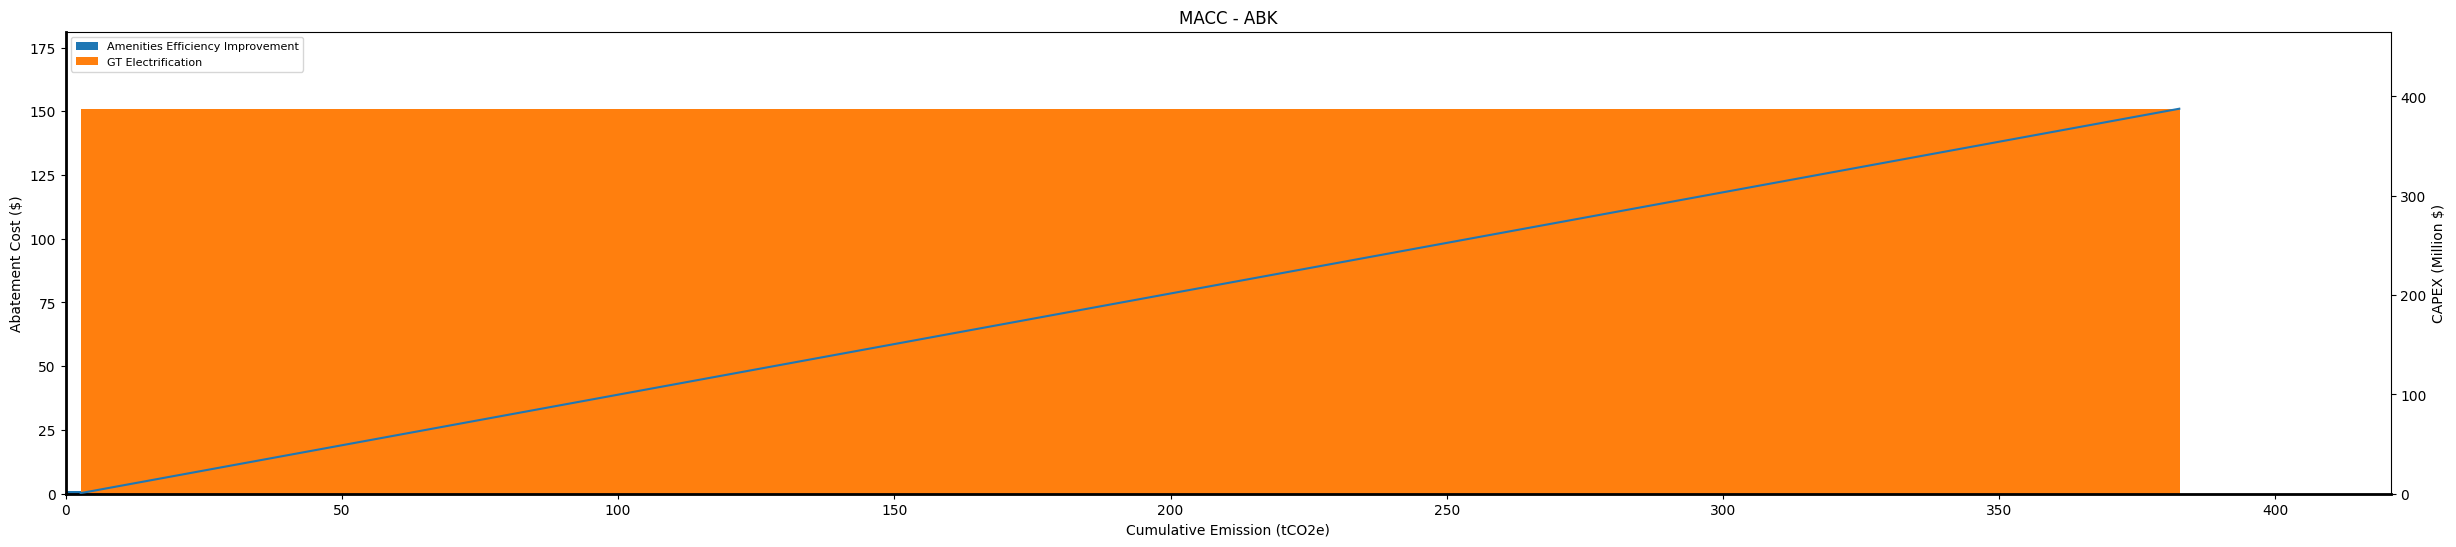

In [94]:
import matplotlib.pyplot as plt
from matplotlib.table import Table
import numpy as np

# plt.style.use("fivethirtyeight")

emission = dfMACC["Cumulative Emission"].tolist()
abat_cost = dfMACC["Abatement Cost"].tolist()
differences = dfMACC["Abatement Potential"].tolist()
opportunity = dfMACC["Opportunity"].tolist()

fig, ax1 = plt.subplots(figsize=(30, 6))
ax1.spines[["left", "bottom"]].set_position(("data", 0))
ax1.spines[["top", "right"]].set_visible(False)


left = 0
pervious = 0
for height, width, opp in zip(abat_cost, differences, opportunity):
    text_x, text_y, rotation = get_text_position(left, width, height, pervious)

    ax1.bar(left, height, width=width, align="edge", label=opp)
    left += width
    previous = get_text_position(left, width, height, pervious)[0]

ax1.set_xlim(0, 1.1 * max(emission))
# ax1.set_xticks(np.arange(0, 1.1 * max(emission), x_scale))


ax1.spines["bottom"].set_linewidth(2)
ax1.spines["left"].set_linewidth(2)
ax1.spines[["top"]].set_visible(False)

ax1.set_xlabel("Cumulative Emission (tCO2e)")
ax1.set_ylabel("Abatement Cost ($)")
ax1.set_title(title)
ax1.legend(loc="upper left", fontsize=8)

ax2 = ax1.twinx()
ax2.grid(visible=False)
cpex = dfMACC["Cumulative CAPEX"].tolist()
ax2.set_xlabel("Cumulative CAPEX (USD)")
ax2.set_ylabel("CAPEX (Million $)")

ax2.plot(emission, cpex)

ax1.set_ylim(min(0, 2 * min(abat_cost)), 1.2 * max(abat_cost))
ax2.set_ylim(min(0, 2 * min(abat_cost)), 1.2 * max(cpex))

plt.show()